In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

import requests
import zipfile
import tempfile

import shutil
import os

folder = tempfile.mkdtemp()

shape_url = "https://opendata.arcgis.com/datasets/d5c9c1d89a5a44e9a7f88f182ffe5ba2_2.zip?outSR=%7B%22latestWkid%22%3A27700%2C%22wkid%22%3A27700%7D"

shapefile = "Wards_December_2016_Generalised_Clipped_Boundaries_in_the_UK.shp"

def download(url, local):
    r = requests.get(url, stream=True)
    if r.status_code == 200:
        with open(local, 'wb') as f:
            r.raw.decode_content = True
            shutil.copyfileobj(r.raw, f)    
    print(f"Downloaded {url}")

def get_zipfile(url, d):
    file = tempfile.mkstemp(dir=d)[1]
    download(url, file)
    with zipfile.ZipFile(file) as myzip:
        myzip.extractall(folder)


get_zipfile(shape_url, folder)
      

map_frame = gpd.read_file(os.path.join(folder, shapefile))


Downloaded https://opendata.arcgis.com/datasets/d5c9c1d89a5a44e9a7f88f182ffe5ba2_2.zip?outSR=%7B%22latestWkid%22%3A27700%2C%22wkid%22%3A27700%7D


(-32904.24233500031, 688432.8474349997, -55405.24029000039, 1281049.441689999)

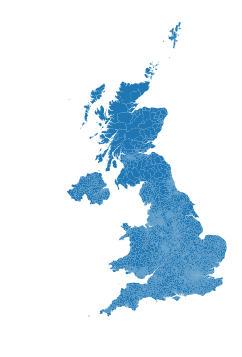

In [10]:

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

map_frame.plot(ax = ax)

# remove the axis
ax.axis('off')


In [12]:

eu_results_url = "http://www.electoralcommission.org.uk/__data/assets/file/0004/175063/European-Parliament-elections-2014-Electoral-data.zip"

get_zipfile(eu_results_url, folder)

Downloaded http://www.electoralcommission.org.uk/__data/assets/file/0004/175063/European-Parliament-elections-2014-Electoral-data.zip


In [13]:
eu_results_file = "EPE 2014 - Electoral data - RESULTS.csv"

In [14]:
results = pd.read_csv(os.path.join(folder, eu_results_file))

In [16]:
results

,Local Authority,Eligible Electorate,Total number of valid votes counted,Valid vote % turnout,Unnamed: 4,Con,Lab,LD,UKIP,Green,...,York First,YOURvoice,TUV,SF,SDLP,DUP,All,Aspire,UUP,Unnamed: 42
0,NI,"1,226,771","626,125",51.04,NaN,"4,144",NaN,NaN,"24,584","10,598",...,NaN,NaN,"75,806","159,813","81,594","131,163","44,432","10,553","83,438",NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Antrim and Newtownabbey,"93,332",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Armagh, Banbridge and Craigavon","136,837",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Belfast,"209,602",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Causeway Coast and Glens,"95,124",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Derry and Strabane,"101,990",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Fermanagh and Omagh,"79,611",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Lisburn and Castlereagh,"94,059",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Mid and East Antrim,"95,438",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
map_frame.loc[map_frame['lad16nm'] == "Aberdeenshire"]

,objectid,wd16cd,wd16nm,wd16nmw,lad16cd,lad16nm,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry
7938,7939,S13002489,Banff and District,None,S12000034,Aberdeenshire,361579,857221,-2.64455,57.603329,2.645008e+08,104435.274038,(POLYGON ((365632.9001000002 865789.5001999997...
7939,7940,S13002490,Troup,None,S12000034,Aberdeenshire,381971,860189,-2.30357,57.631271,2.548375e+08,122288.657136,(POLYGON ((370356.9029000001 852537.0031000003...
7940,7941,S13002491,Fraserburgh and District,None,S12000034,Aberdeenshire,400411,861478,-1.99478,57.643211,6.662983e+07,50117.439014,(POLYGON ((396761.3976999996 867243.4034000002...
7941,7942,S13002492,Central Buchan,None,S12000034,Aberdeenshire,395795,848127,-2.07186,57.523270,3.854151e+08,120795.552802,"POLYGON ((400867.6030000001 857307.5975000001,..."
7942,7943,S13002493,Peterhead North and Rattray,None,S12000034,Aberdeenshire,407478,854863,-1.87660,57.583729,1.104690e+08,80643.657443,"POLYGON ((405394.9001000002 863541.1031999998,..."
7943,7944,S13002494,Peterhead South and Cruden,None,S12000034,Aberdeenshire,407732,838797,-1.87285,57.439419,8.536096e+07,72969.267828,(POLYGON ((407592.8026000001 832314.6017000005...
7944,7945,S13002495,Turriff and District,None,S12000034,Aberdeenshire,372192,843010,-2.46534,57.476459,3.600126e+08,113641.867982,"POLYGON ((373578.8005999997 831936.7997999992,..."
7945,7946,S13002496,Mid Formartine,None,S12000034,Aberdeenshire,385699,833983,-2.23959,57.396011,3.000526e+08,124960.272560,"POLYGON ((384324.0033999998 823458.9966000002,..."
7946,7947,S13002497,Ellon and District,None,S12000034,Aberdeenshire,398204,830433,-2.03150,57.364349,1.965200e+08,110619.660656,"(POLYGON ((402945.3997 835385.6026000008, 4030..."
7947,7948,S13002498,West Garioch,None,S12000034,Aberdeenshire,366533,824830,-2.55722,57.312790,2.556284e+08,127821.273238,"POLYGON ((370980.9962999998 813484.7017000001,..."
